# Statlog (Heart)

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat -O statlog_heart.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

--2023-01-18 19:28:03--  http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16461 (16K) [application/x-httpd-php]
Saving to: 'statlog_heart.data'

statlog_heart.data  100%[===================>]  16.08K  73.4KB/s    in 0.2s    

2023-01-18 19:28:03 (73.4 KB/s) - 'statlog_heart.data' saved [16461/16461]

File 'heart.doc' already there; not retrieving.



# Data Wrangling

In [4]:
names = ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral',
         'fasting blood sugar', 'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak',
         'the slope of the peak exercise ST segment', 'number of major vessels', 'thal', 'class']

In [5]:
data = pd.read_csv("statlog_heart.data", sep=" ", names=names)

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the original encoding (1, 2) to (0, 1) in class attribute

In [7]:
data["class"].replace((1, 2), (0, 1), inplace=True)

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("statlog_heart_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read_csv("statlog_heart_prepared.csv",
                   index_column="patient_id")

2023-01-18 19:28:04,738 - root INFO - Added all columns to `obs`.
2023-01-18 19:28:04,745 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `270` x `14`.


In [11]:
adata.var_names

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak',
       'the slope of the peak exercise ST segment', 'number of major vessels',
       'thal', 'class'],
      dtype='object')

In [12]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 270 obs and 14 vars
╚══ 🔓 Unencoded variables
    ╠══ age -> data type: floating
    ╠══ sex -> data type: floating
    ╠══ chest pain type -> data type: floating
    ╠══ resting blood pressure -> data type: floating
    ╠══ serum cholestoral -> data type: floating
    ╠══ fasting blood sugar -> data type: floating
    ╠══ resting electrocardiographic results -> data type: floating
    ╠══ maximum heart rate achieved -> data type: floating
    ╠══ exercise induced angina -> data type: floating
    ╠══ oldpeak -> data type: floating
    ╠══ the slope of the peak exercise ST segment -> data type: floating
    ╠══ number of major vessels -> data type: floating
    ╠══ thal -> data type: floating
    ╚══ class -> data type: floating

Quality control metrics missing. Calculating...

2023-01-18 19:28:04,846 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

2023-01-18 19:28:04,863 - root INFO - Column names for numeric variables ['oldpeak', 'serum cholestoral', 'the slope of the peak exercise ST segment', 'resting blood pressure', 'resting electrocardiographic results', 'sex', 'number of major vessels', 'chest pain type', 'fasting blood sugar', 'class', 'thal', 'exercise induced angina', 'age', 'maximum heart rate achieved'] were replaced.


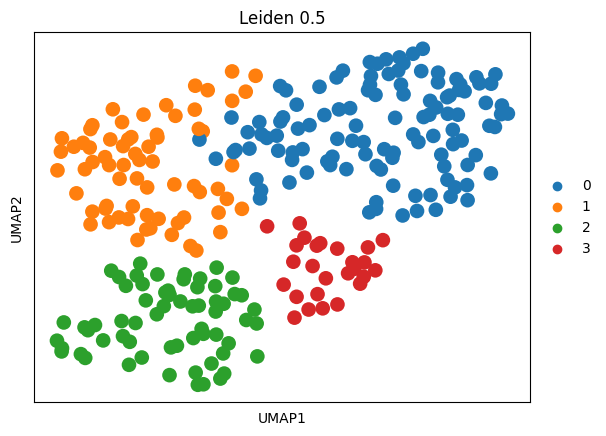

In [13]:
ep.pp.knn_impute(adata)
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

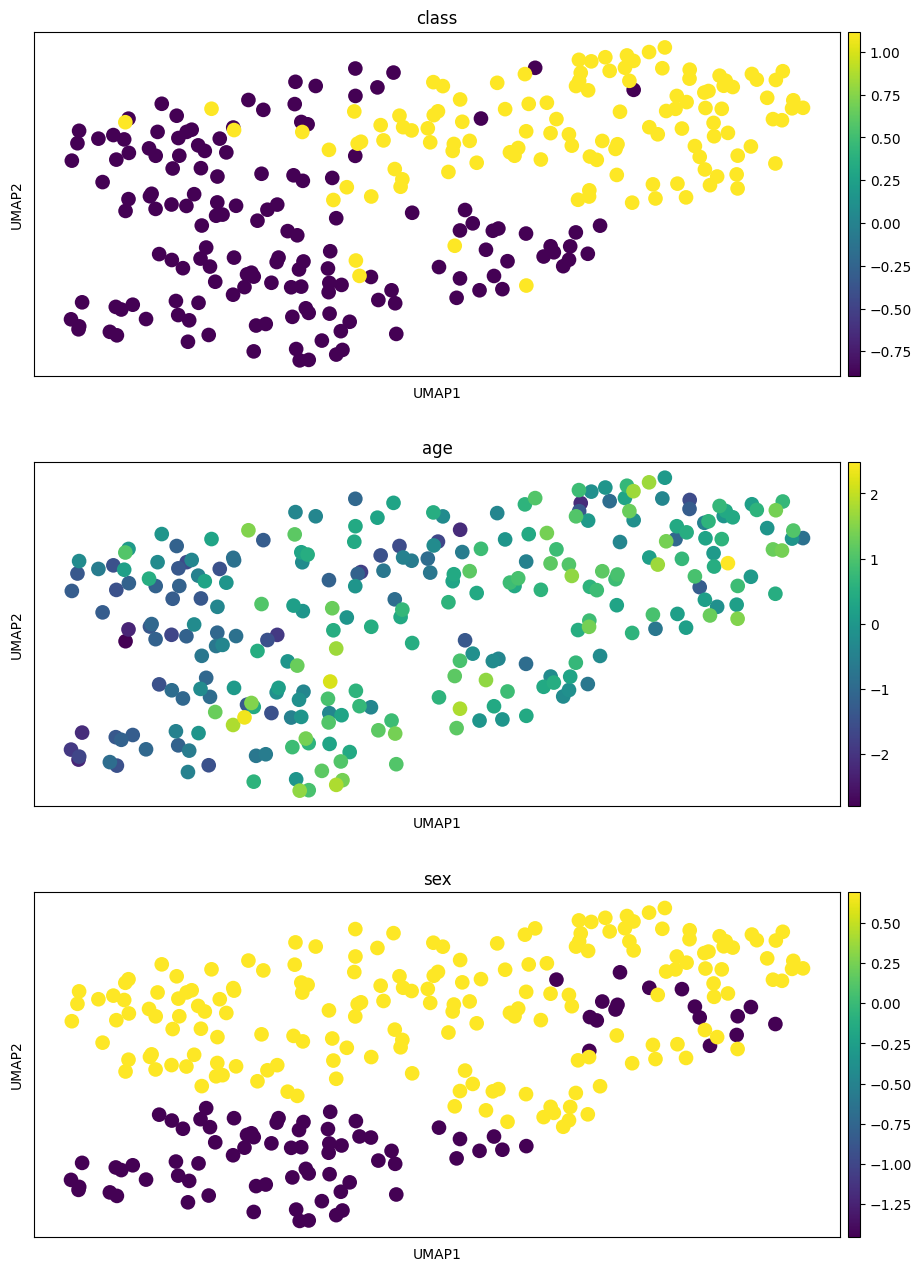

In [14]:
ep.pl.umap(adata, color=["class", "age", "sex"], ncols=1, wspace=0.75)